In [1]:
# !pip install neptune > /dev/null 2>&1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import neptune

In [27]:
def get_full_table(tags, start_end, component_name, download=True, exp_rate=None, table=None, negative_tags=None, granularities=None):
    if download:
        project = neptune.init_project(
            project="pmtest/llm-random",
            mode="read-only",
            api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyMDY0ZDI5Ni05YWU3LTQyNGYtYmY4My1hZTFkY2EzYmUwMjgifQ=="
        )
        
        # Determine the column name based on start_end
        start_end_dict_name = "relative_lr" if start_end == "start" else "relative_scheduler_fraction"
        arg_val_column = f"args/{start_end_dict_name}/{component_name}"
        print(arg_val_column)
        
        # Define the columns of interest
        columns = ["loss", arg_val_column]
        
        # Handle tags for baseline and specific conditions
        baseline_tags = tags + ["baseline"]
        specific_tags = tags + [start_end, component_name]
        
        # Fetch tables
        table_baseline = project.fetch_runs_table(tag=baseline_tags).to_pandas()
        table_baseline = table_baseline[columns]
        table_specific = project.fetch_runs_table(tag=specific_tags).to_pandas()
        table_specific = table_specific[columns]
        
    return table_specific, table_baseline

In [28]:
start_end = "start"
component_name = "head"
tags = ["relative_lr", "medium", "local_minimum"]
table_specific, table_baseline = get_full_table(tags=tags, start_end=start_end, component_name=component_name)


https://app.neptune.ai/pmtest/llm-random/
args/relative_lr/head
Number of experiments: 6
All sizes and token counts in table:
       loss  args/relative_lr/head
0  3.663328                  0.666
1  3.686363                  1.000
2  3.726680                  2.660
3  3.734096                  1.330
4  3.649711                  0.330
5  3.645006                  0.170


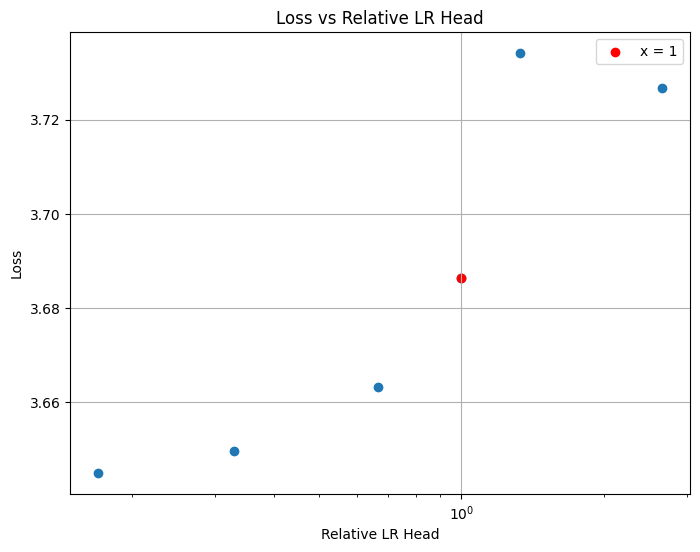

In [32]:
import matplotlib.pyplot as plt

# Plotting with just points (scatter plot)
plt.figure(figsize=(8, 6))

# Plot all points in default color
plt.scatter(table_specific.iloc[:, 1], table_specific['loss'], color='blue')
plt.scatter(table_specific.iloc[:, 1], table_specific['loss'], color='green', label='x = 1')

# Highlight the point where x = 1 in red
plt.scatter(1, table_specific[table_specific.iloc[:, 1] == 1]['loss'], color='red', label='x = 1')

# Set x-axis to log scale
plt.xscale('log')
plt.xlabel('Relative LR Head')
plt.ylabel('Loss')
plt.title('Loss vs Relative LR Head')
plt.grid(True)

# Optional: Add a legend
plt.legend()

plt.show()
